In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv('prices-split-adjusted - Copy.csv')

In [84]:
df.head()

,date,symbol,open,close,low,high,volume
0,05-01-16,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
1,06-01-16,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
2,07-01-16,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
3,08-01-16,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
4,11-01-16,WLTW,117.010002,114.970001,114.089996,117.330002,1408600


In [85]:
df.drop(['symbol', 'low', 'high', 'volume'], axis=1, inplace=True)

In [86]:
df.tail()

,date,open,close
246,23-12-16,123.089996,124.489998
247,27-12-16,124.570000,124.279999
248,28-12-16,124.300003,122.379997
249,29-12-16,122.449997,122.169998
250,30-12-16,122.589996,122.279999


In [87]:
# Convert the 'date' column to datetime format using the correct format string
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%y')

# Melt the DataFrame to create a 'price' column with 'open' and 'close' as types
df_melted = df.melt(id_vars=['date'], value_vars=['open', 'close'],
                    var_name='type', value_name='price')

# Sort the DataFrame by 'date'
df_sorted = df_melted.sort_values(by='date')

df_sorted.set_index('date', inplace=True)



# Drop the 'type' column if not needed
new_df = df_sorted.drop(columns=['type'])
new_df.reset_index(inplace=True)

# Display the final sorted DataFrame
print(new_df)

          date       price
0   2016-01-05  123.430000
1   2016-01-05  125.839996
2   2016-01-06  125.239998
3   2016-01-06  119.980003
4   2016-01-07  116.379997
..         ...         ...
497 2016-12-28  124.300003
498 2016-12-29  122.169998
499 2016-12-29  122.449997
500 2016-12-30  122.589996
501 2016-12-30  122.279999

[502 rows x 2 columns]


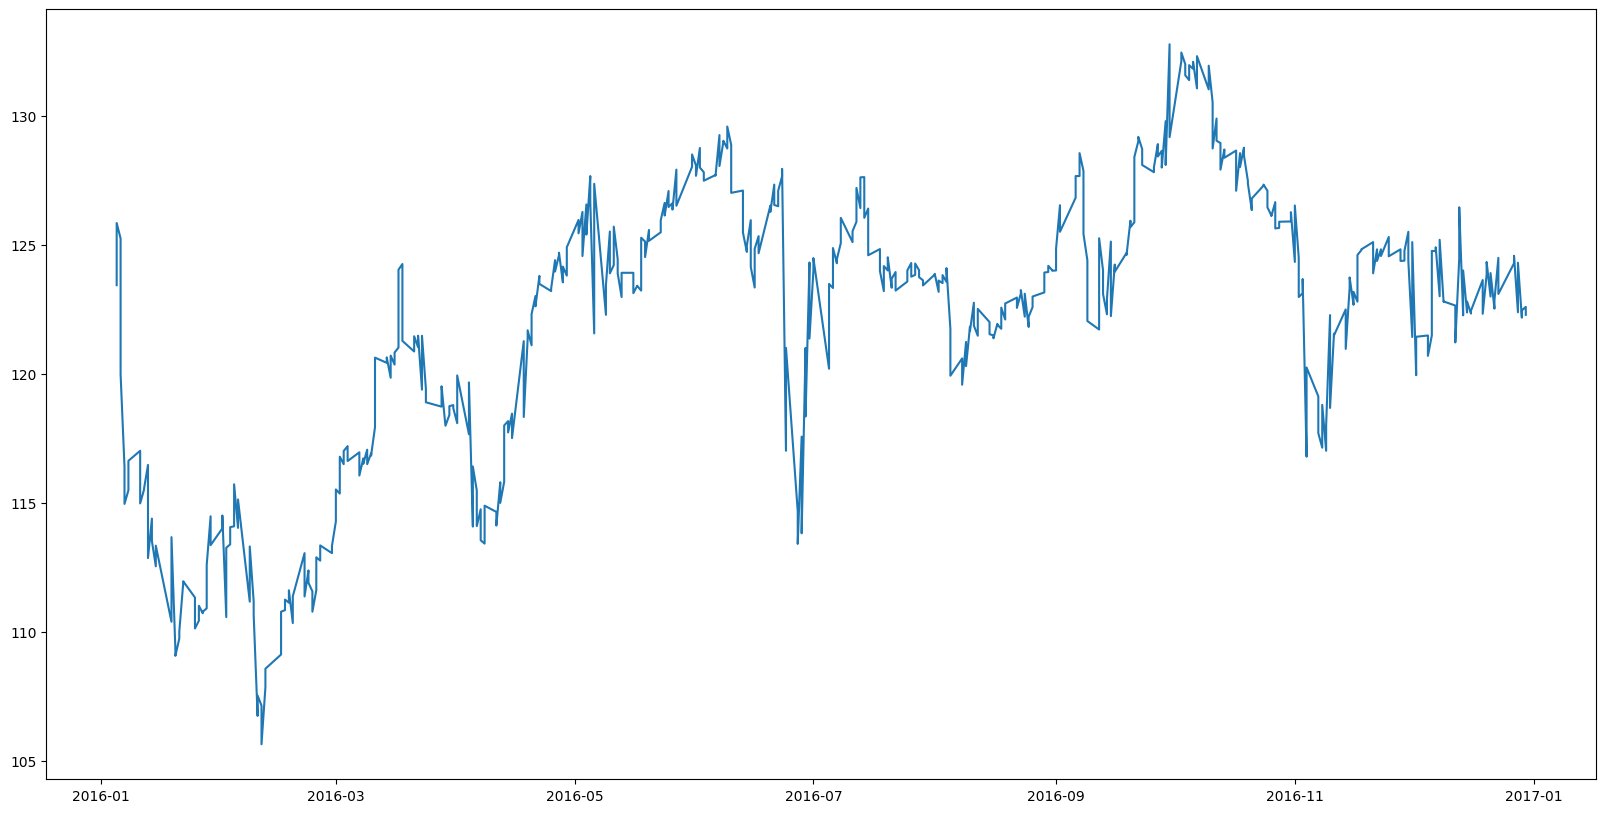

In [88]:
plt.figure(figsize=(20, 10))
plt.plot(new_df['date'], new_df['price'])
plt.show()
# TODO: вернуть график красивым

In [89]:
from statsmodels.tsa.stattools import adfuller

In [90]:
result = adfuller(new_df['price'], regression='c')  # Используем константу

print('DF(значение статистики):', result[0])
print('Критические значения:')

for key, value in result[4].items():
        if result[0] < value:
            print(f'При уровне значимости {key}({value}), нулевая гипотеза отвергается: ряд стационарен.')
        else:
            print(f'При уровне значимости {key}({value}), нулевая гипотеза не отвергается: ряд нестационарен.')

DF(значение статистики): -2.520603649287085
Критические значения:
При уровне значимости 1%(-3.4435494520411605), нулевая гипотеза не отвергается: ряд нестационарен.
При уровне значимости 5%(-2.8673612117611267), нулевая гипотеза не отвергается: ряд нестационарен.
При уровне значимости 10%(-2.5698704830567247), нулевая гипотеза не отвергается: ряд нестационарен.


In [91]:
log_series = np.log(new_df['price'])

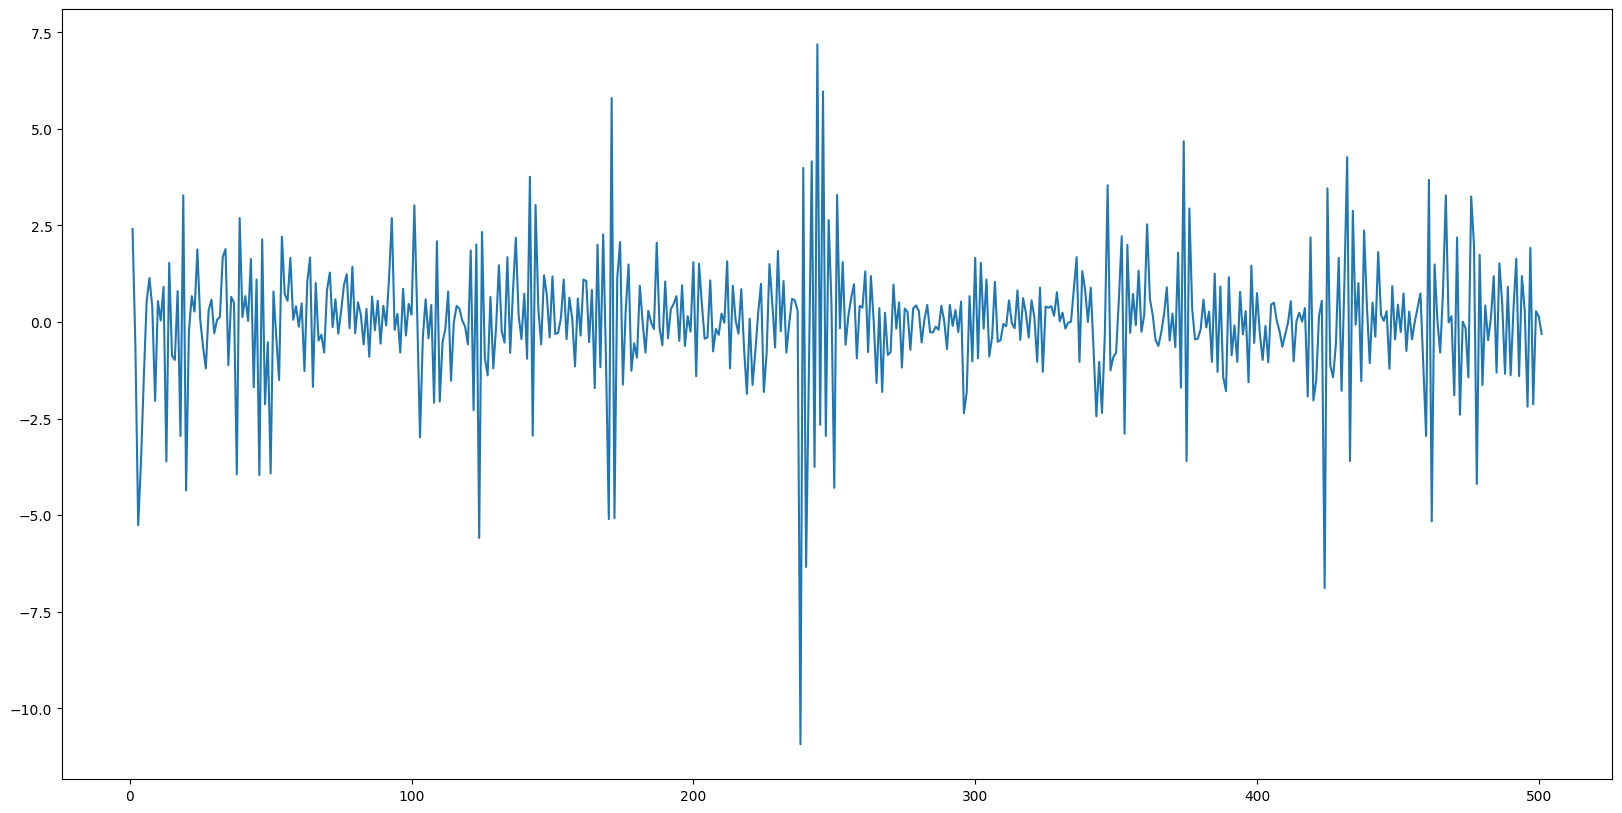

In [92]:
diff_series = new_df['price'].diff().dropna()
plt.figure(figsize=(20, 10))
plt.plot(diff_series)
plt.show()

In [93]:
result = adfuller(diff_series, regression='c')  # Используем константу

print('DF(значение статистики):', result[0])
print('Критические значения:')

for key, value in result[4].items():
        if result[0] < value:
            print(f'При уровне значимости {key}({value}), нулевая гипотеза отвергается: ряд стационарен.')
        else:
            print(f'При уровне значимости {key}({value}), нулевая гипотеза не отвергается: ряд нестационарен.')

DF(значение статистики): -10.479703799565462
Критические значения:
При уровне значимости 1%(-3.4436298692815304), нулевая гипотеза отвергается: ряд стационарен.
При уровне значимости 5%(-2.867396599893435), нулевая гипотеза отвергается: ряд стационарен.
При уровне значимости 10%(-2.5698893429241916), нулевая гипотеза отвергается: ряд стационарен.


In [94]:
index_train = new_df[new_df['date'] == '2016-12-01'].index[0]
index_train

460

In [95]:
new_df.count()

date     502
price    502
dtype: int64

In [96]:
train_series = diff_series[:index_train]
test_series = diff_series[index_train:]
train_series, test_series

(1      2.409996
 2     -0.599998
 3     -5.259995
 4     -3.600006
 5     -1.430000
          ...   
 456    0.009994
 457    0.380005
 458    0.739998
 459   -1.129997
 460   -2.950005
 Name: price, Length: 460, dtype: float64,
 461    3.680000
 462   -5.159996
 463    1.489998
 464    0.050003
 465   -0.790001
 466    0.790001
 467    3.279999
 468   -0.010002
 469    0.150002
 470   -1.900002
 471    2.190002
 472   -2.400001
 473    0.010002
 474   -0.160004
 475   -1.430000
 476    3.250000
 477    1.989998
 478   -4.189995
 479    1.739998
 480   -1.629997
 481    0.430000
 482   -0.470001
 483    0.110000
 484    1.189995
 485   -1.309997
 486    1.519996
 487    0.490006
 488   -1.340004
 489    0.910004
 490   -1.380005
 491    0.330001
 492    1.640000
 493   -1.400002
 494    1.190003
 495    0.290001
 496   -2.190003
 497    1.920006
 498   -2.130005
 499    0.279999
 500    0.139999
 501   -0.309997
 Name: price, dtype: float64)

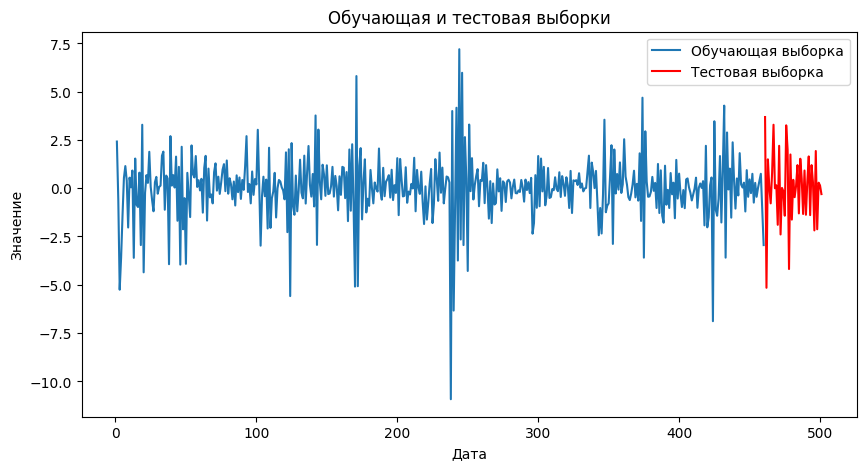

C:\Users\ilyar\teachmeskills\TMSds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ilyar\teachmeskills\TMSds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ilyar\teachmeskills\TMSds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ilyar\teachmeskills\TMSds\venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ilyar\teachmeskills\TMSds\venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: Val

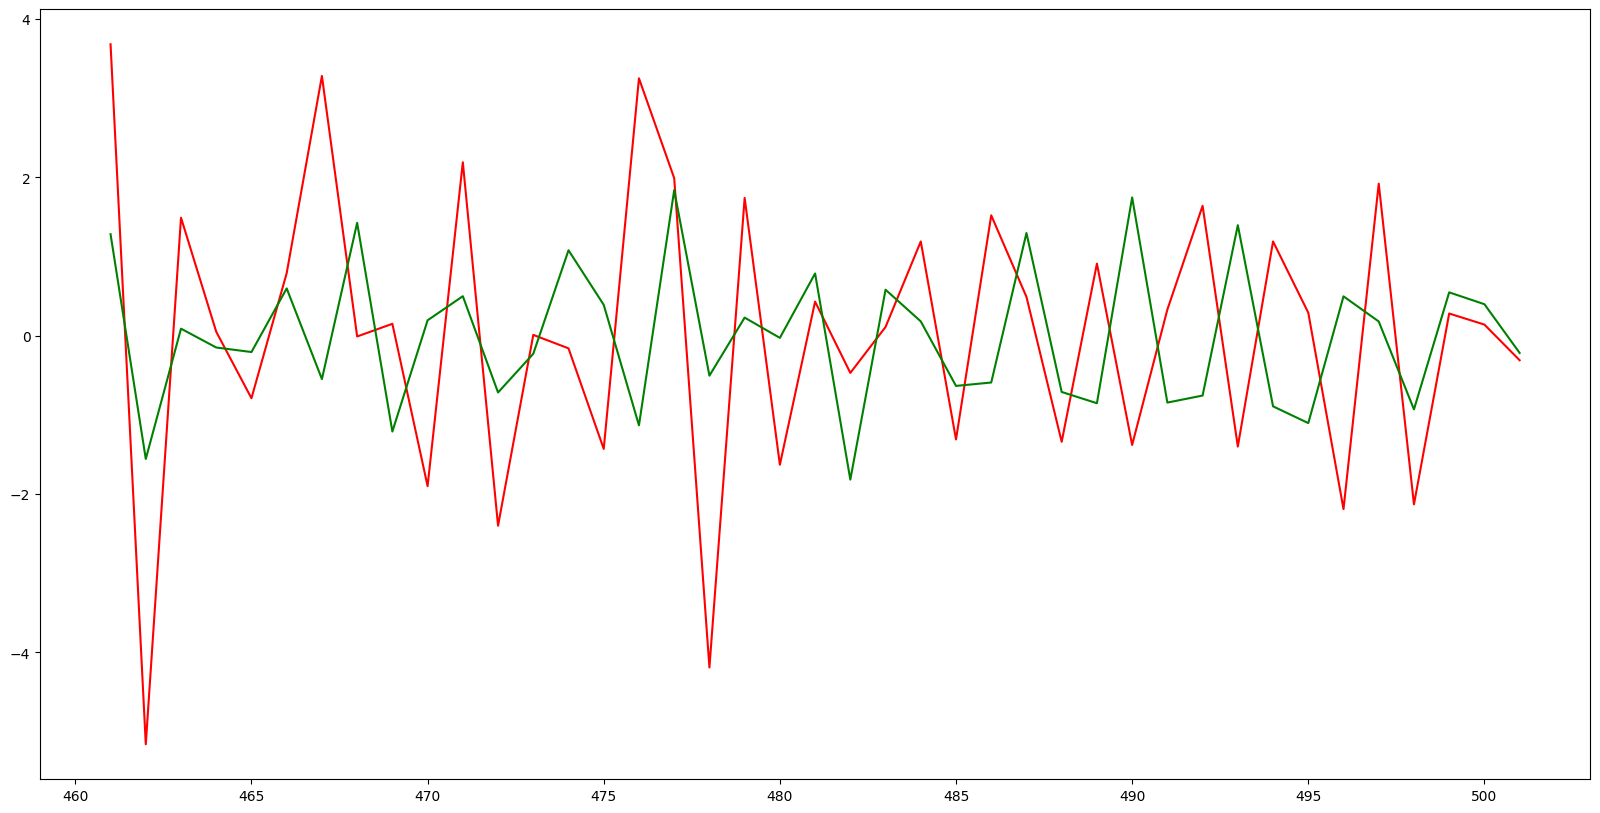

In [103]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Визуализация обучающей и тестовой выборок
plt.figure(figsize=(10, 5))
plt.plot(train_series, label='Обучающая выборка')
plt.plot(test_series, label='Тестовая выборка', color='red')
plt.title('Обучающая и тестовая выборки')
plt.xlabel('Дата')
plt.ylabel('Значение')
plt.legend()
plt.show()

# Создание и обучение модели ARIMA
model = ARIMA(train_series, order=(65, 0, 20))
model_fit = model.fit()

# Прогнозирование на тестовой выборке
forecast = model_fit.forecast(steps=len(test_series))

# Визуализация прогнозов и фактических значений тестовой выборки
plt.figure(figsize=(20, 10))
# plt.plot(train_series, label='Обучающая выборка')
plt.plot(test_series.index, test_series.values, label='Фактические значения', color='red')
plt.plot(test_series.index, forecast.values, label='Прогноз', color='green')

In [104]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(test_series, forecast)

In [105]:
mae

1.5483827498929619